In [241]:
import pandas as pd
import numpy as np


In [313]:
data = pd.read_csv('glassdoor_data_analyst_jobs.csv')

In [316]:
data.head()

,rating,company_name,job_position,location,salary_estimate
0,4.1,S&P Global,Data Analyst,India,₹3L - ₹6L ...
1,4.2,Airtel India,Data Analyst,Gurgaon,₹5L - ₹9L ...
2,4.0,Barclays,Analyst - RFT Data Operations ...,New Delhi,₹8L - ₹8L ...
3,4.2,Airtel India,Business Analyst - Messaging ...,Gurgaon,₹40T - ₹45T ...
4,3.2,Glamyo Health,Data Analyst,New Delhi,₹7L - ₹11L ...


### Few correction in Location column

In [317]:
# Replacing Connaught Place to New Delhi and Hyderābād to Hyderabad

data['location'] = data['location'].str.strip().replace('Connaught Place', 'New Delhi')
data['location'] = data['location'].str.strip().replace('Hyderābād', 'Hyderabad')

### Standardizing Salary Estimate

In [318]:
# Define function to covert Thousand into Lakh
def convert_salary_estimate(estimate):
    if pd.notnull(estimate) and "T" in estimate:
        low = float(estimate.replace("T", "")) * 0.12
        return f"{low:.1f}L"
    else:
        return estimate
    
# Define function to convert string salary to int
def convert_salary_to_int(salary):
    if isinstance(salary, str):
        salary = salary.replace('L', '').replace('T', '')
        salary = round(float(salary))
    return salary

# Define function to calculate
def custom_average(val1, val2):
    if np.isnan(val2):
        return val1 / 2
    else:
        return (val1 + val2) / 2

In [319]:
# Standardizing salary
# removing NaN
# get rid of (Glassdoor Est.)
# convert salary Thousand(T) to Lakhs(L)
# calculate average salary

# Drop rows where 'salary_estimate' is null
data = data.dropna(subset=['salary_estimate'])

# Extract low and high salaries from 'salary_estimate' column and remove currency symbols
data['salary'] = data['salary_estimate'].apply(lambda x: x.split('(')[0])
data[['Low_Salary', 'High_Salary']] = data['salary'].str.split(' - ', expand=True)
data['Low_Salary'] = data['Low_Salary'].str.replace('₹', '')
data['High_Salary'] = data['High_Salary'].str.replace('₹', '')

# Convert salary estimates to Lakhs
data['Low_Salary'] = data['Low_Salary'].apply(convert_salary_estimate)
data['High_Salary'] = data['High_Salary'].apply(convert_salary_estimate)

# join Low and High salary column and xreating new column salary range
data['Salary_Range'] = data.apply(lambda row: f"{row['Low_Salary']} - {row['High_Salary']}", axis=1)
data['salary_range (INR)'] = data['Salary_Range'].apply(lambda x: x.split('- None')[0]) # removing (- None) from Salary_Range column

# Convert salary estimates to Lakhs
data['Low_Salary'] = data['Low_Salary'].apply(convert_salary_to_int)
data['High_Salary'] = data['High_Salary'].apply(convert_salary_to_int)

# Calculate and add average salary column in Lakhs
data['average_salary (Lakhs)'] = data.apply(lambda row: custom_average(row['Low_Salary'], row['High_Salary']), axis=1)

# drop columns []
data = data.drop(['salary_estimate', 'Salary_Range', 'salary', 'Low_Salary', 'High_Salary'], axis=1)

C:\Users\9ayus\AppData\Local\Temp\ipykernel_18292\290499303.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['salary'] = data['salary_estimate'].apply(lambda x: x.split('(')[0])
C:\Users\9ayus\AppData\Local\Temp\ipykernel_18292\290499303.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['Low_Salary', 'High_Salary']] = data['salary'].str.split(' - ', expand=True)
C:\Users\9ayus\AppData\Local\Temp\ipykernel_18292\290499303.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy

In [320]:
data

,rating,company_name,job_position,location,salary_range (INR),average_salary (Lakhs)
0,4.1,S&P Global,Data Analyst,India,3L - 6L ...,4.5
1,4.2,Airtel India,Data Analyst,Gurgaon,5L - 9L ...,7.0
2,4.0,Barclays,Analyst - RFT Data Operations ...,New Delhi,8L - 8L ...,8.0
3,4.2,Airtel India,Business Analyst - Messaging ...,Gurgaon,4.8L - 5.4L,5.0
4,3.2,Glamyo Health,Data Analyst,New Delhi,7L - 11L ...,9.0
...,...,...,...,...,...,...
5960,NaN,Market Ninety Nine Pvt. Ltd ...,Business Analyst,New Delhi,6.0L - 7.2L,6.5
5961,NaN,Raazi Clinical Laboratory ...,Data Analyst (Remote) ...,Hyderabad,4L - 6L ...,5.0
5962,NaN,Innobuzz Learning Solutions ...,Business Analyst - Tableau ...,Gurgaon,2.2L - 2.6L,2.5
5963,NaN,NatWest Group,Data Modelling Business Analys...,India,4L - 7L ...,5.5


### Creating a rating bucket list

In [321]:
data['rating'].unique()


array([4.1, 4.2, 4. , 3.2, 5. , 3.8, 3.9, 3. , 3.6, 3.7, nan])

In [322]:
# create rating bucket list
bucket_list = []

ratings = data['rating']
# Loop through each rating in the 'ratings' list
for rating in ratings:
    # Check if the rating is not NaN
    if not pd.isna(rating):
        # Round the rating to the nearest 0.5 and add it to the bucket list
        if 1 <= rating < 1.5:
            rounded_rating = 1
        elif 1.5 <= rating < 2:
            rounded_rating = 1.5
        elif 2 <= rating < 2.5:
            rounded_rating = 2
        elif 2.5 <= rating < 3:
            rounded_rating = 2.5
        elif 3 <= rating < 3.5:
            rounded_rating = 3
        elif 3.5 <= rating < 4:
            rounded_rating = 3.5
        elif 4 <= rating < 4.5:
            rounded_rating = 4
        elif 4.5 <= rating < 5:
            rounded_rating = 4.5
        elif 5:
            rounded_rating = 5
        else:
            rounded_rating = round(rating * 2) / 2
        bucket_list.append(rounded_rating)
    else:
        # If the rating is NaN, append it to the bucket list as is
        bucket_list.append(rating)

# Add the bucket list as a new column to the r_data DataFrame
data['rating_bucket_list'] = bucket_list


In [323]:
data.head()

,rating,company_name,job_position,location,salary_range (INR),average_salary (Lakhs),rating_bucket_list
0,4.1,S&P Global,Data Analyst,India,3L - 6L ...,4.5,4.0
1,4.2,Airtel India,Data Analyst,Gurgaon,5L - 9L ...,7.0,4.0
2,4.0,Barclays,Analyst - RFT Data Operations ...,New Delhi,8L - 8L ...,8.0,4.0
3,4.2,Airtel India,Business Analyst - Messaging ...,Gurgaon,4.8L - 5.4L,5.0,4.0
4,3.2,Glamyo Health,Data Analyst,New Delhi,7L - 11L ...,9.0,3.0


In [328]:
data = data.rename(columns={'average_salary': 'average_salary_lakhs', 'salary_range (INR)': 'salary_range_INR'})
data.head()

,rating,company_name,job_position,location,salary_range_INR,average_salary_lakhs,rating_bucket_list
0,4.1,S&P Global,Data Analyst,India,3L - 6L ...,4.5,4.0
1,4.2,Airtel India,Data Analyst,Gurgaon,5L - 9L ...,7.0,4.0
2,4.0,Barclays,Analyst - RFT Data Operations ...,New Delhi,8L - 8L ...,8.0,4.0
3,4.2,Airtel India,Business Analyst - Messaging ...,Gurgaon,4.8L - 5.4L,5.0,4.0
4,3.2,Glamyo Health,Data Analyst,New Delhi,7L - 11L ...,9.0,3.0


In [330]:
def title_simplifier(job_role):
    if 'data scientist' in job_role:
        return 'data scientist'
    elif 'Data Analyst' in job_role:
        return 'Data Analyst'
    elif 'Data Analytics' in job_role:
        return 'Data Analyst'
    elif 'Business Analyst' in job_role:
        return 'Business Analyst'
    elif 'Data engineering' in job_role:
        return 'Data engineering'
    elif 'Product Analyst' in job_role:
        return 'Product Analyst'
    else:
        return 'na'

def seniority(job_role):
    if 'sr' in job_role or 'senior' in job_role or 'Senior' in job_role or 'SENIOR' in job_role:
        return 'senior'
    elif 'jr' in job_role or 'junior' in job_role or 'Junior' in job_role or 'JUNIOR' in job_role:
        return 'junior'
    else:
        return 'na'

In [332]:
data['job_simp'] = data['job_position'].apply(title_simplifier)
data.job_simp.value_counts()

Data Analyst        2189
na                  1592
Business Analyst     796
Data engineering     199
Product Analyst      199
Name: job_simp, dtype: int64

In [333]:
data['seniority'] = data['job_position'].apply(seniority)
data.seniority.value_counts()

na        4577
senior     398
Name: seniority, dtype: int64

In [334]:
data.location.value_counts()

New Delhi     1592
India          796
Gurgaon        796
Noida          398
Bangalore      398
Chandigarh     199
Jaipur         199
Remote         199
Mumbai         199
Hyderabad      199
Name: location, dtype: int64

In [335]:
def state_asignment(location):
    if 'New Delhi' in location:
        return 'Delhi'
    elif 'Gurgaon' in location:
        return 'Haryana'
    elif 'Noida' in location:
        return 'Uttar Pradesh'
    elif 'Bangalore' in location:
        return 'Karnataka'
    elif 'Chandigarh' in location:
        return 'Chandigarh'
    elif 'Jaipur' in location:
        return 'Rajasthan'
    elif 'Mumbai' in location:
        return 'Maharastra'
    elif 'Hyderabad' in location:
        return 'Telangana'
    elif 'Remote' in location:
        return 'Remote'
    elif 'India' in location:
        return 'India'
    else:
        return 'na'
    

In [336]:
data['state'] = data['location'].apply(state_asignment)
data.state.value_counts()

Delhi            1592
India             796
Haryana           796
Uttar Pradesh     398
Karnataka         398
Chandigarh        199
Rajasthan         199
Remote            199
Maharastra        199
Telangana         199
Name: state, dtype: int64

In [337]:
data.head()

,rating,company_name,job_position,location,salary_range_INR,average_salary_lakhs,rating_bucket_list,job_simp,seniority,state
0,4.1,S&P Global,Data Analyst,India,3L - 6L ...,4.5,4.0,Data Analyst,na,India
1,4.2,Airtel India,Data Analyst,Gurgaon,5L - 9L ...,7.0,4.0,Data Analyst,na,Haryana
2,4.0,Barclays,Analyst - RFT Data Operations ...,New Delhi,8L - 8L ...,8.0,4.0,na,na,Delhi
3,4.2,Airtel India,Business Analyst - Messaging ...,Gurgaon,4.8L - 5.4L,5.0,4.0,Business Analyst,na,Haryana
4,3.2,Glamyo Health,Data Analyst,New Delhi,7L - 11L ...,9.0,3.0,Data Analyst,na,Delhi


### .csv output

In [329]:
# Write the DataFrame to a CSV file
data.to_csv('salary_data_cleaned.csv', index=False)

In [180]:
data.value_counts('rating_bucket_list') # rating count

rating_bucket_list
4.0    1791
3.5     995
3.0     398
5.0     398
dtype: int64

In [222]:
data.value_counts('location') # # location count

location
New Delhi     1592
Gurgaon        796
India          796
Bangalore      398
Noida          398
Chandigarh     199
Hyderabad      199
Jaipur         199
Mumbai         199
Remote         199
dtype: int64

In [223]:
data.value_counts('average_salary (Lakhs)') # Checking the average salary count

average_salary (Lakhs)
5.0    597
5.5    597
7.0    597
9.0    597
2.5    398
4.5    398
6.0    398
6.5    398
7.5    398
3.5    199
8.0    199
8.5    199
dtype: int64

### Analyzing average salary based on location

In [206]:
data.value_counts('location')

location
New Delhi     1592
Gurgaon        796
India          796
Bangalore      398
Noida          398
Chandigarh     199
Hyderabad      199
Jaipur         199
Mumbai         199
Remote         199
dtype: int64

In [220]:
# Group the data by location and calculate the mean salary
location_mean_salary = data.groupby('location')['average_salary (Lakhs)'].mean().round(1).reset_index()

# Print the results
print(location_mean_salary)

     location  average_salary (Lakhs)
0   Bangalore                     8.8
1  Chandigarh                     2.5
2     Gurgaon                     5.1
3   Hyderabad                     5.0
4       India                     5.5
5      Jaipur                     6.5
6      Mumbai                     6.0
7   New Delhi                     6.9
8       Noida                     6.5
9      Remote                     5.5


### Analyzing average salary based on job role

In [312]:
data.value_counts('job_position').reset_index()

,job_position,0
0,Data Analyst,1393
1,Analyst - Impairment Analytics...,199
2,Data Governance Analyst ...,199
3,Senior Research Analyst ...,199
4,SENIOR DATA ANALYST ...,199
5,Product Analyst,199
6,Pricing Analyst,199
7,Data engineering ESG Analyst ...,199
8,Data Review Analyst ...,199
9,Data Modelling Business Analys...,199


In [265]:
# Group the data by job role and calculate the mean salary
job_role_mean_salary = data.groupby('job_position')['average_salary (Lakhs)'].mean().round(1).reset_index()
job_role_mean_salary

,job_position,average_salary (Lakhs)
0,Analyst - Impairment Analytics...,4.5
1,Analyst - RFT Data Operations ...,8.0
2,Business Analyst,6.5
3,Business Analyst - Messaging ...,5.0
4,Business Analyst - Tableau ...,2.5
5,Data Analyst,7.0
6,Data Analyst (Remote) ...,5.0
7,Data Analyst Intern ...,7.0
8,Data Analytics,6.0
9,Data Analytics Intern ...,5.5


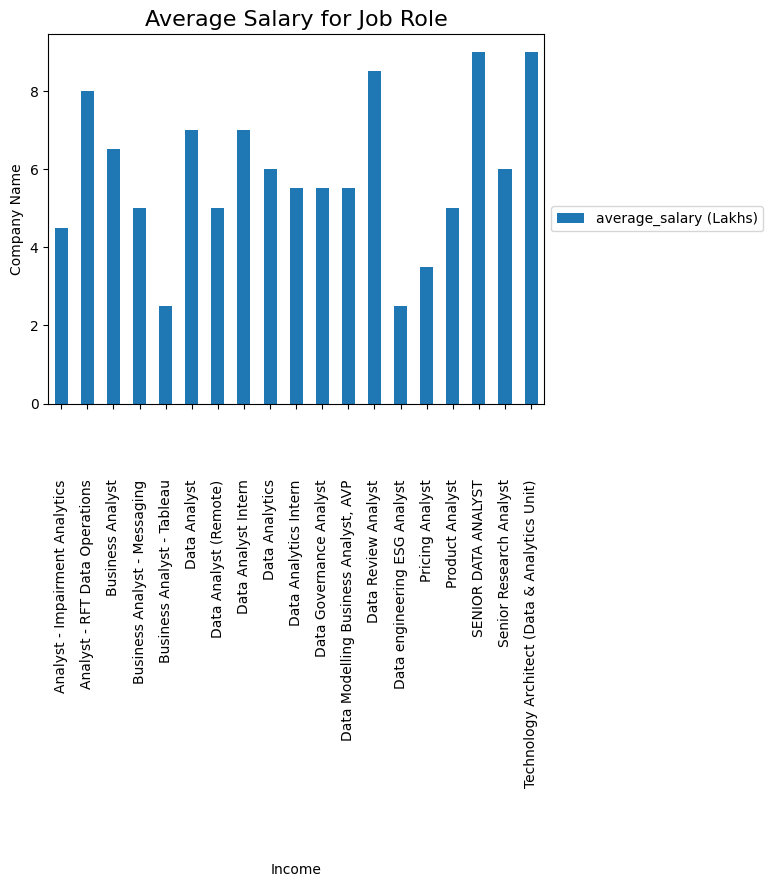

In [269]:
import matplotlib.pyplot as plt

# create a grouped bar chart
job_role_mean_salary[['average_salary (Lakhs)', 'job_position']].plot(kind='bar')
plt.title('Average Salary for Job Role', size=16)
plt.xlabel('Income')
plt.ylabel('Company Name')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) # move legend to the right

# set x-axis labels to job positions
labels = job_role_mean_salary['job_position'].tolist()
plt.gca().set_xticklabels(labels)

plt.show()


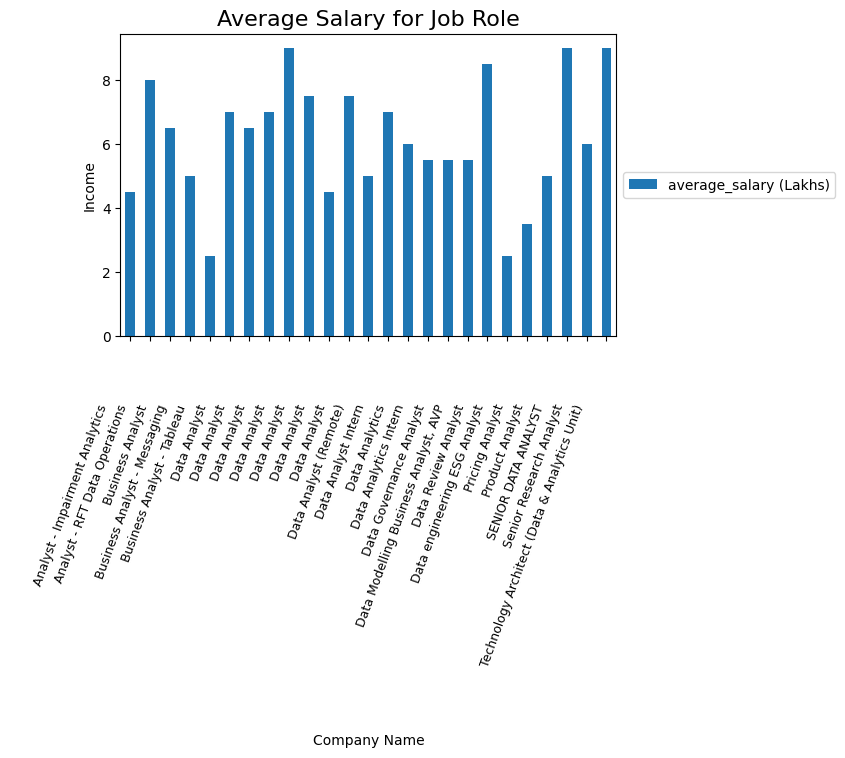

In [311]:
import matplotlib.pyplot as plt

# create a grouped bar chart
job_role_mean_salary[['average_salary (Lakhs)', 'job_position']].plot(kind='bar')
plt.title('Average Salary for Job Role', size=16)
plt.xlabel('Company Name')
plt.ylabel('Income')
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) # move legend to the right
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) # move legend to the right

# set x-axis labels to job positions and rotate them by 45 degrees
labels = job_role_mean_salary['job_position'].tolist()
plt.gca().set_xticklabels(labels, rotation=45, ha='right')

# adjust the plot to fit the x-axis labels properly and move the x-axis label closer to the chart
plt.subplots_adjust(bottom=0.25)

# Rotate x-axis labels by 70 degrees and set font size
plt.xticks(rotation=70)
plt.rcParams["xtick.labelsize"] = 9

plt.show()


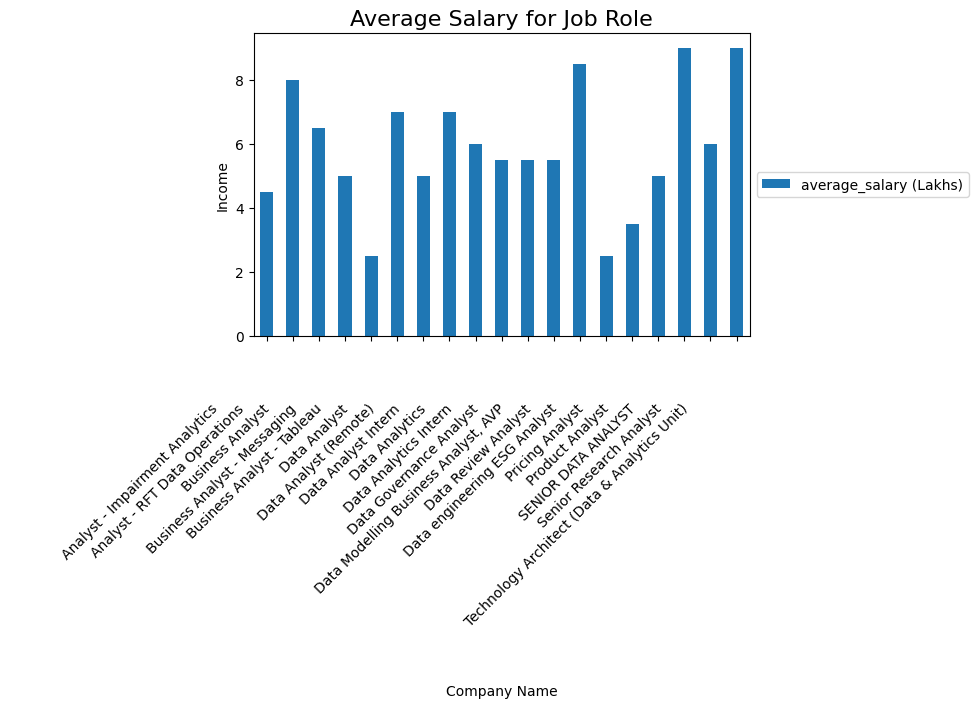

In [302]:
import matplotlib.pyplot as plt

# create a grouped bar chart
job_role_mean_salary[['average_salary (Lakhs)', 'job_position']].plot(kind='bar')
plt.title('Average Salary for Job Role', size=16)
plt.xlabel('Company Name')
plt.ylabel('Income')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) # move legend to the right

# set x-axis labels to job positions and rotate them by 45 degrees
labels = job_role_mean_salary['job_position'].tolist()
plt.gca().set_xticks(range(len(labels)))
plt.gca().set_xticklabels(labels, rotation=45, ha='right')
plt.gca().tick_params(axis='x', which='major', pad=10) # add padding to x-tick labels

# adjust the plot to fit the x-axis labels properly and move the x-axis label closer to the chart
plt.subplots_adjust(bottom=0.25)

plt.show()


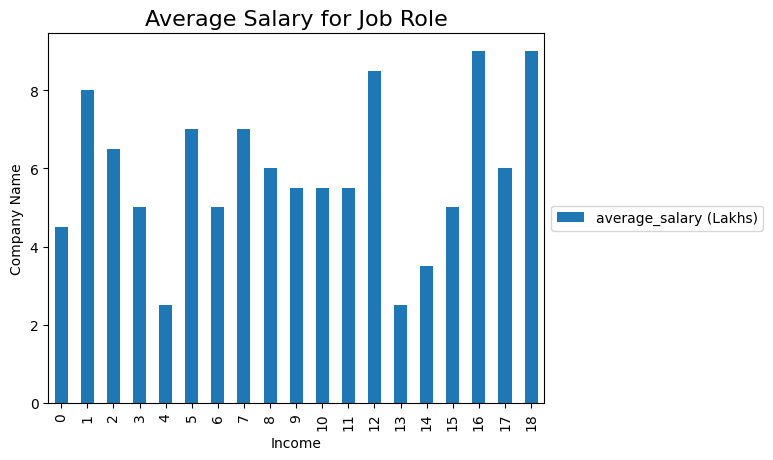

In [268]:
import matplotlib.pyplot as plt

# create a grouped bar chart
job_role_mean_salary[['average_salary (Lakhs)', 'job_position']].plot(kind='bar')
plt.title('Average Salary for Job Role', size=16)
plt.xlabel('Income')
plt.ylabel('Company Name')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) # move legend to the right
plt.show()


### Analyze the average salary offer by the company.

In [226]:
data.value_counts('company_name')

company_name
                 Barclays                                                         398
                 Airtel India                                                     398
                 91Squarefeet                                                     199
                 Infosys Limited                                                  199
                 S&P Global                                                       199
                 RxLogix                                                          199
                 Raazi Clinical Laboratory                                        199
                 OPK eServices                                                    199
                 NatWest Group                                                    199
                 Market Ninety Nine Pvt. Ltd                                      199
                 Interactive Education Concepts, Inc                              199
                 Innobuzz Learning Soluti

In [245]:
# Group the data by job role and calculate the mean salary
company_mean_salary = data.groupby('company_name')['average_salary (Lakhs)'].mean().round(1).reset_index()
company_mean_salary

,company_name,average_salary (Lakhs)
0,91Squarefeet,5.0
1,Airtel India,6.0
2,ArchsystemInc,3.5
3,Barclays,6.2
4,Data Bridge Market Research ...,6.0
5,Deloitte,8.5
6,Dileep Essentials Pvt. Ltd. ...,6.5
7,Elegant Auto Retail ...,5.5
8,Fincor Management Advisory Se...,2.5
9,Fuel Intelligence ...,6.0


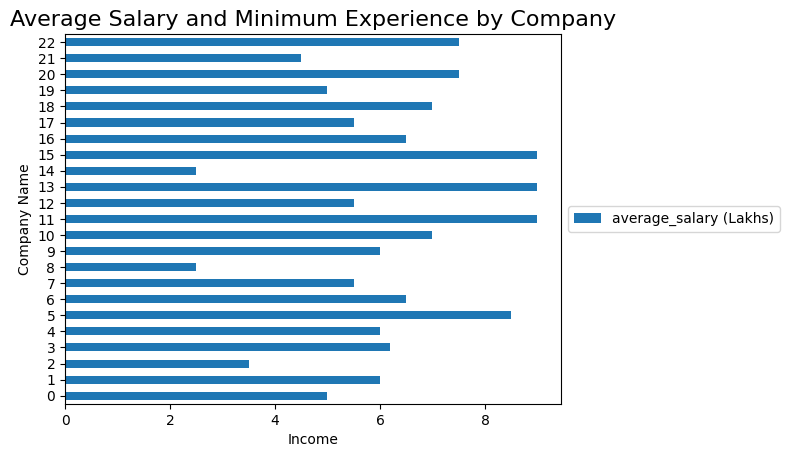

In [254]:
import matplotlib.pyplot as plt

# create a grouped bar chart
company_mean_salary[['average_salary (Lakhs)', 'company_name']].plot(kind='barh')
plt.title('Average Salary and Minimum Experience by Company', size=16)
plt.xlabel('Income')
plt.ylabel('Company Name')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) # move legend to the right
plt.show()


### Analyzing salary based on company rating

In [250]:
# Group the data by location and calculate the mean salary
rating_mean_salary = data.groupby('rating_bucket_list')['average_salary (Lakhs)'].mean().round(1).reset_index()
rating_mean_salary

,rating_bucket_list,average_salary (Lakhs)
0,3.0,7.2
1,3.5,7.0
2,4.0,6.1
3,5.0,4.5


### Correlation Matrix

In [231]:
# How many unique values are in Columns of Data ?
for i in data.columns:
    print(F'{i}:',len(data[i].unique()))

rating: 11
company_name: 23
job_position: 19
location: 10
salary_range (INR): 22
average_salary (Lakhs): 12
rating_bucket_list: 5


C:\Users\9ayus\AppData\Local\Temp\ipykernel_18292\1969560388.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


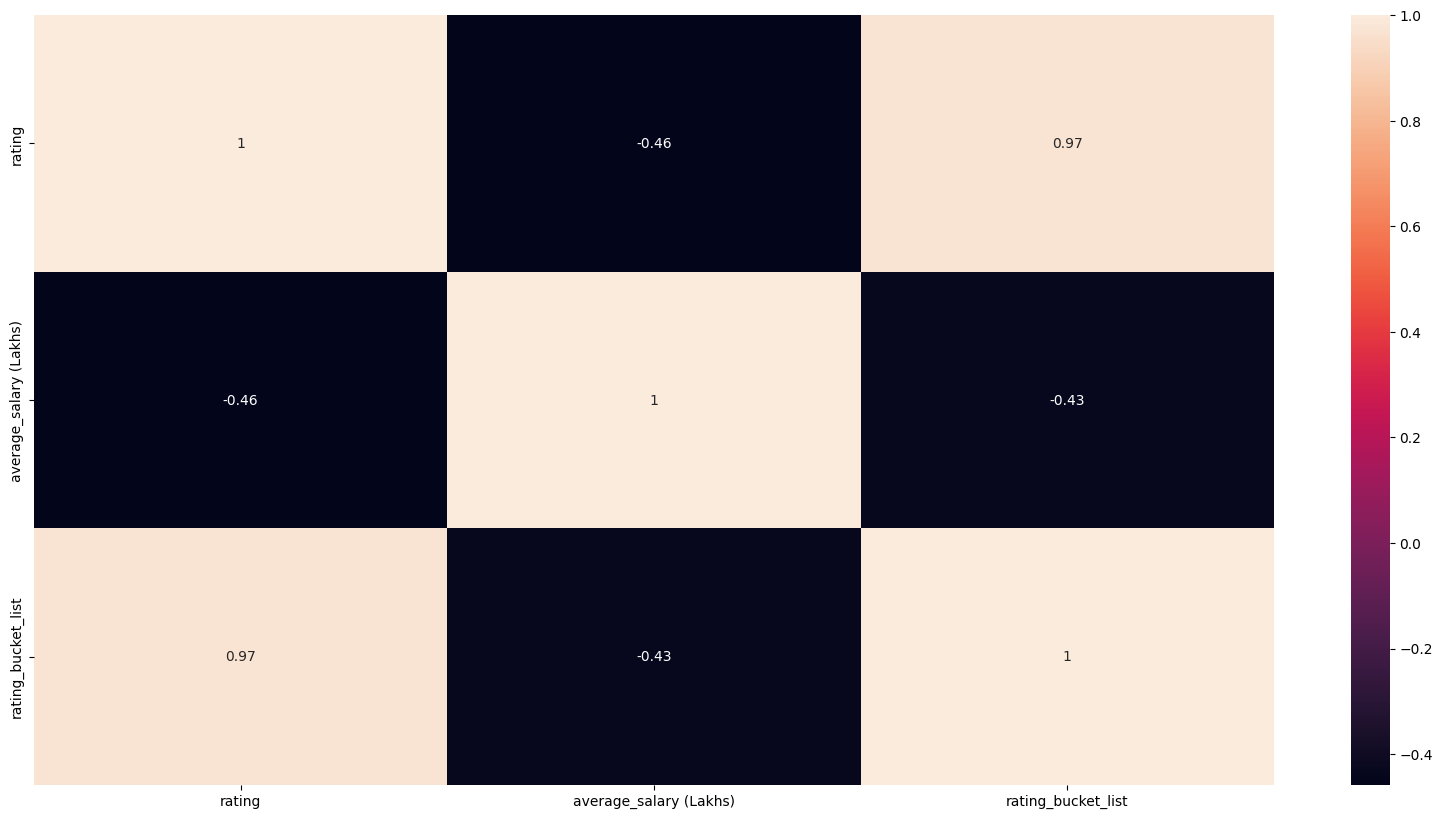

In [230]:
# Correleation Matrix for entire dataset
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [306]:
import pandas as pd

# Calculate the average salary for each job position and company name
job_role_mean_salary = data.groupby(['job_position', 'company_name'])['average_salary (Lakhs)'].mean().round(1).reset_index()
job_role_mean_salary

,job_position,company_name,average_salary (Lakhs)
0,Analyst - Impairment Analytics...,Barclays,4.5
1,Analyst - RFT Data Operations ...,Barclays,8.0
2,Business Analyst,Market Ninety Nine Pvt. Ltd ...,6.5
3,Business Analyst - Messaging ...,Airtel India,5.0
4,Business Analyst - Tableau ...,Innobuzz Learning Solutions ...,2.5
5,Data Analyst,Airtel India,7.0
6,Data Analyst,Dileep Essentials Pvt. Ltd. ...,6.5
7,Data Analyst,GYPR PVT LTD,7.0
8,Data Analyst,Glamyo Health,9.0
9,Data Analyst,RxLogix,7.5


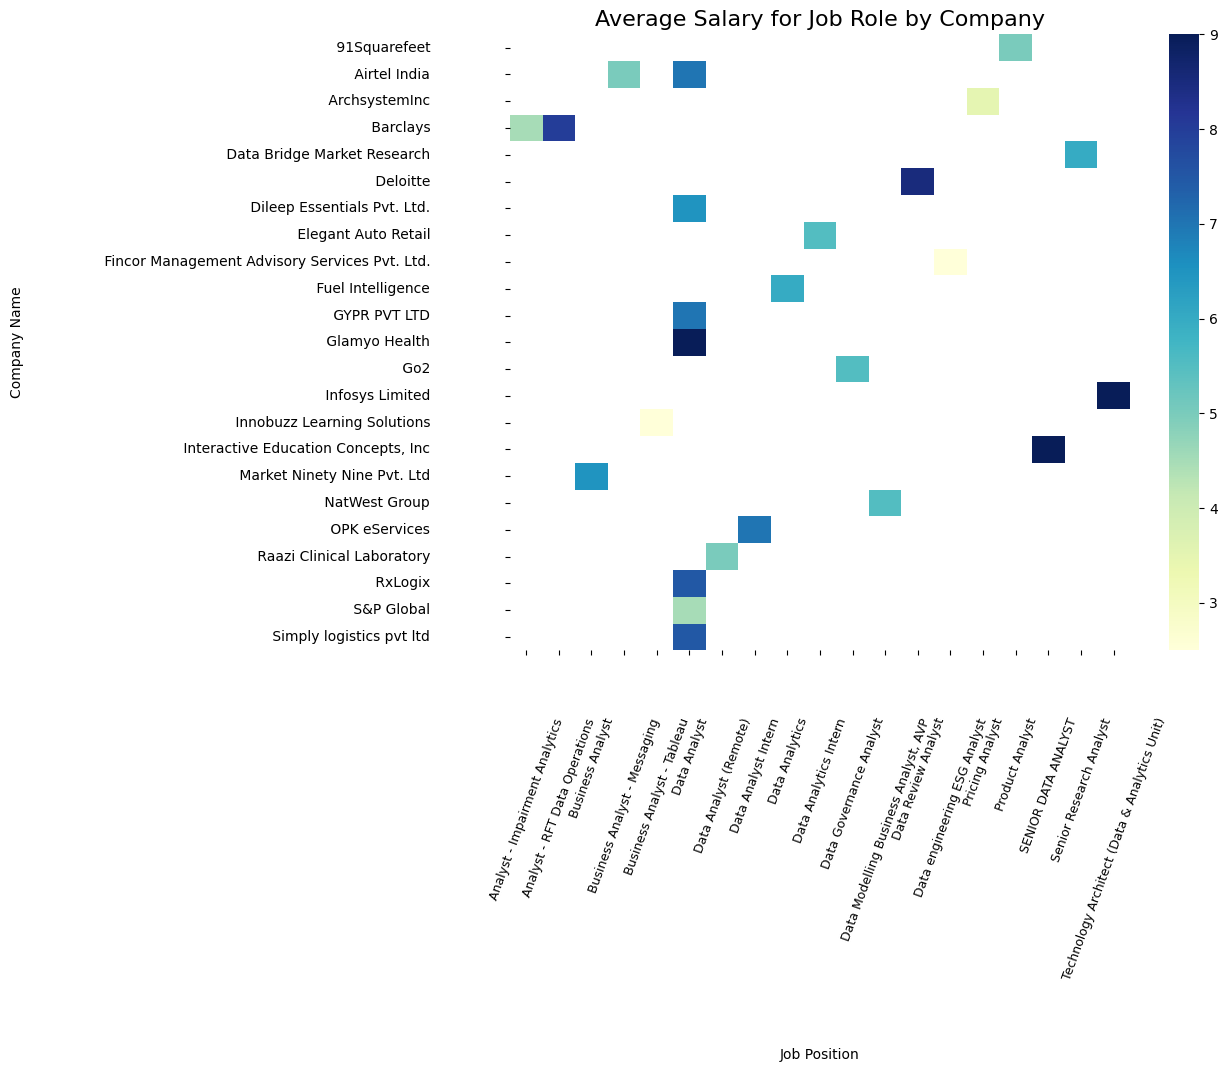

In [310]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check if the 'company_name' column exists in the dataframe
if 'company_name' not in job_role_mean_salary.columns:
    print("Error: 'company_name' column does not exist in the dataframe.")
else:
    # Pivot table to get average salary of each job position in each company
    pivot_table = job_role_mean_salary.pivot(index='company_name', columns='job_position', values='average_salary (Lakhs)')

    # Create heatmap using seaborn
    plt.figure(figsize=(10,8))
    sns.heatmap(pivot_table, cmap='YlGnBu')
    plt.title('Average Salary for Job Role by Company', size=16)
    plt.xlabel('Job Position')
    plt.ylabel('Company Name')

    # Rotate x-axis labels by 70 degrees and set font size
    plt.xticks(rotation=70)
    plt.rcParams["xtick.labelsize"] = 9

    plt.show()


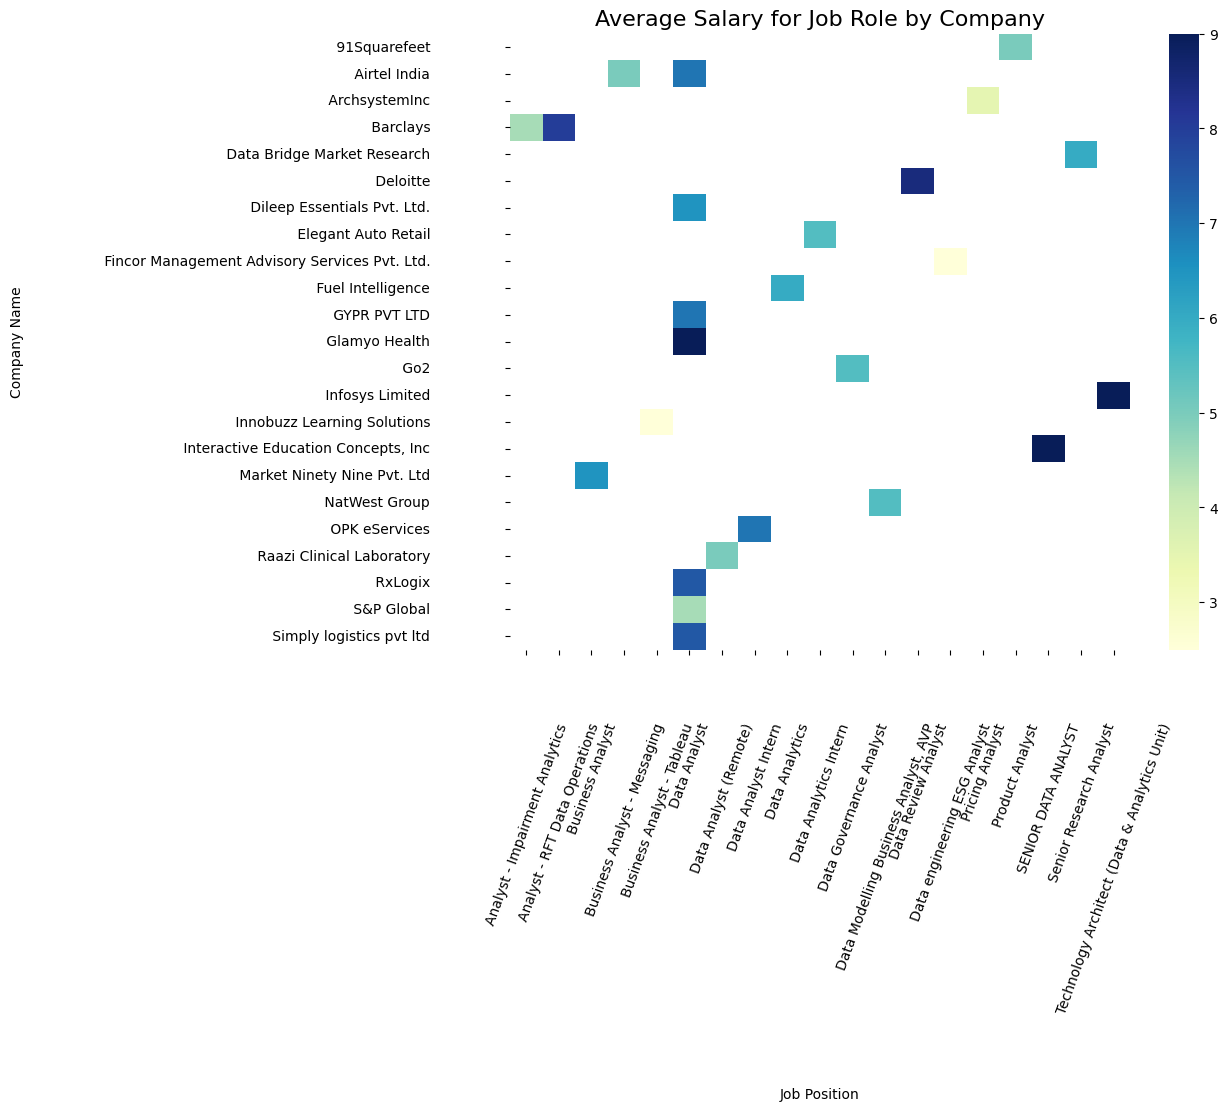

In [309]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a dictionary of formatted job role names
job_role_format_dict = {
    'data_scientist': 'Data Scientist',
    'data_analyst': 'Data Analyst',
    'software_engineer': 'Software Engineer'
}

# Check if the 'company_name' column exists in the dataframe
if 'company_name' not in job_role_mean_salary.columns:
    print("Error: 'company_name' column does not exist in the dataframe.")
else:
    # Replace the job position names with formatted names
    job_role_mean_salary['job_position'] = job_role_mean_salary['job_position'].replace(job_role_format_dict)

    # Pivot table to get average salary of each job position in each company
    pivot_table = job_role_mean_salary.pivot(index='company_name', columns='job_position', values='average_salary (Lakhs)')

    # Create heatmap using seaborn
    plt.figure(figsize=(10,8))
    sns.heatmap(pivot_table, cmap='YlGnBu')
    plt.title('Average Salary for Job Role by Company', size=16)
    plt.xlabel('Job Position')
    plt.ylabel('Company Name')
    
    # Rotate x-axis labels by 70 degrees and set font size
    plt.xticks(rotation=70)
    plt.rcParams["xtick.labelsize"] = 9
    
    plt.show()


In [232]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4975 entries, 0 to 5964
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   rating                  3582 non-null   float64
 1   company_name            4975 non-null   object 
 2   job_position            4975 non-null   object 
 3   location                4975 non-null   object 
 4   salary_range (INR)      4975 non-null   object 
 5   average_salary (Lakhs)  4975 non-null   float64
 6   rating_bucket_list      3582 non-null   float64
dtypes: float64(3), object(4)
memory usage: 310.9+ KB
